## Used libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
dataset_path = "/kaggle/input/plant-leaf-image-dataset/New_data"
categories = os.listdir(dataset_path)
img_size = (224, 224)

## Reading and storing the data 

In [3]:
images = []
labels = []

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    label = categories.index(category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

## Data spliting

In [4]:
images = np.array(images)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

## Sample of the data

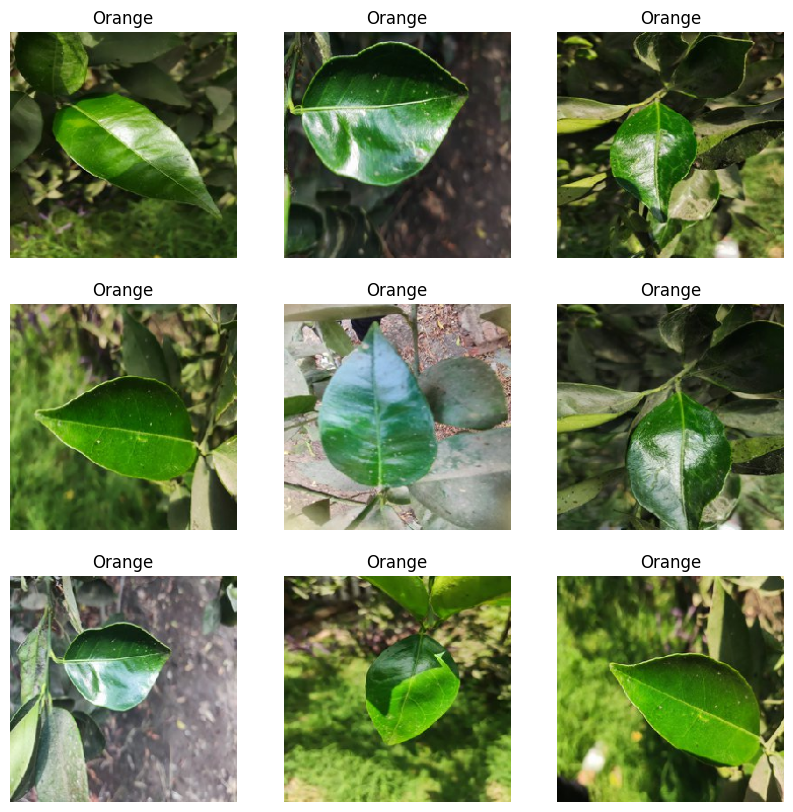

In [5]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(categories[labels[i]])
    plt.axis("off")
plt.show()

## Building the model

In [6]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dense(len(categories), activation="softmax")
])

model.compile(optimizer=Adam(learning_rate=0.00005), loss="categorical_crossentropy", metrics=["accuracy"])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Model training

In [7]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=16)

Epoch 1/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - accuracy: 0.3180 - loss: 2.0011 - val_accuracy: 0.8593 - val_loss: 0.7356
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9028 - loss: 0.5978 - val_accuracy: 0.9471 - val_loss: 0.3492
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9572 - loss: 0.2901 - val_accuracy: 0.9638 - val_loss: 0.2244
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9761 - loss: 0.1985 - val_accuracy: 0.9749 - val_loss: 0.1568
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9858 - loss: 0.1249 - val_accuracy: 0.9791 - val_loss: 0.1211
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9921 - loss: 0.0922 - val_accuracy: 0.9861 - val_loss: 0.0948
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9938 - loss: 0.0734 - val_accuracy: 0.9875 - val_loss: 0.0784
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9953 - loss: 0.0561 - val_acc

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9972 - loss: 0.0164
Test Accuracy: 1.00


## Performance metrics

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=categories))

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step
              precision    recall  f1-score   support

      Orange       1.00      1.00      1.00       131
       Berry       1.00      1.00      1.00        69
      Tomato       1.00      1.00      1.00        30
         Fig       1.00      1.00      1.00       104
       Apple       0.98      1.00      0.99       102
       Guava       1.00      1.00      1.00        98
   Persimmon       1.00      0.99      0.99        88
        Palm       1.00      0.99      0.99        96

    accuracy                           1.00       718
   macro avg       1.00      1.00      1.00       718
weighted avg       1.00      1.00      1.00       718



## Confusion matrix

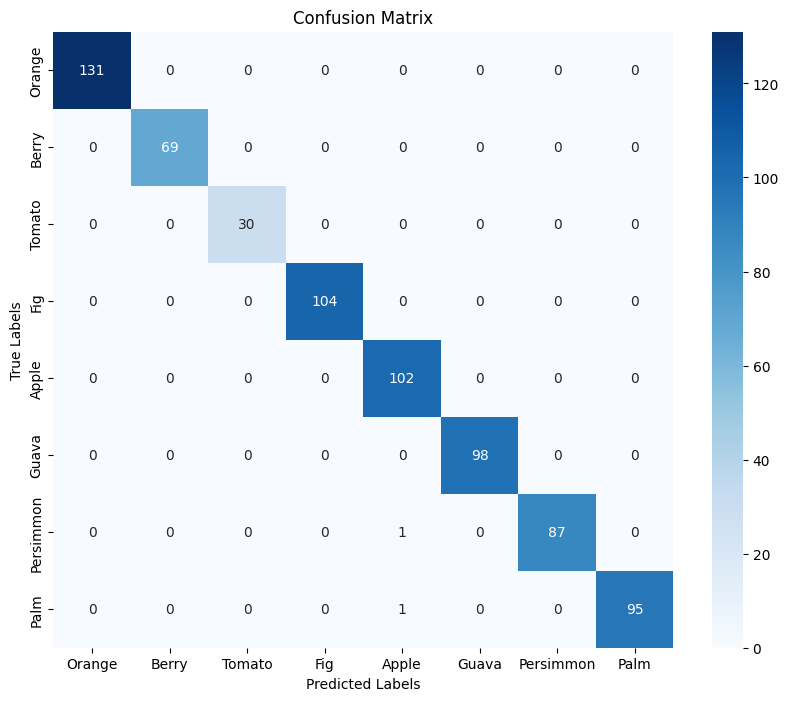

In [10]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Accuracy and loss

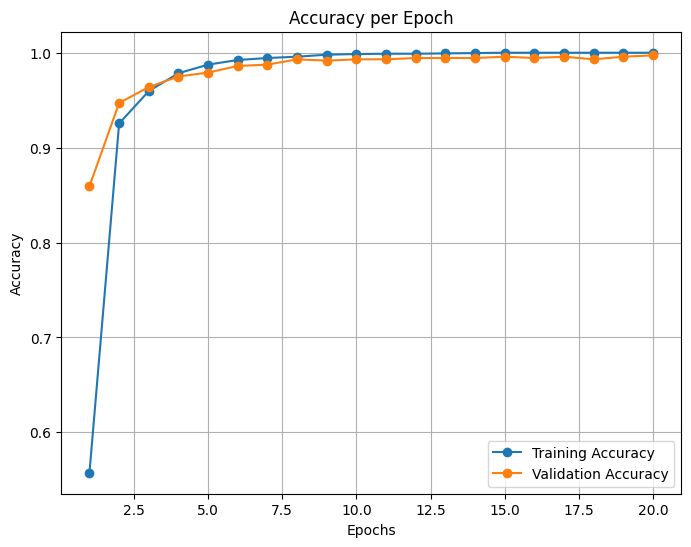

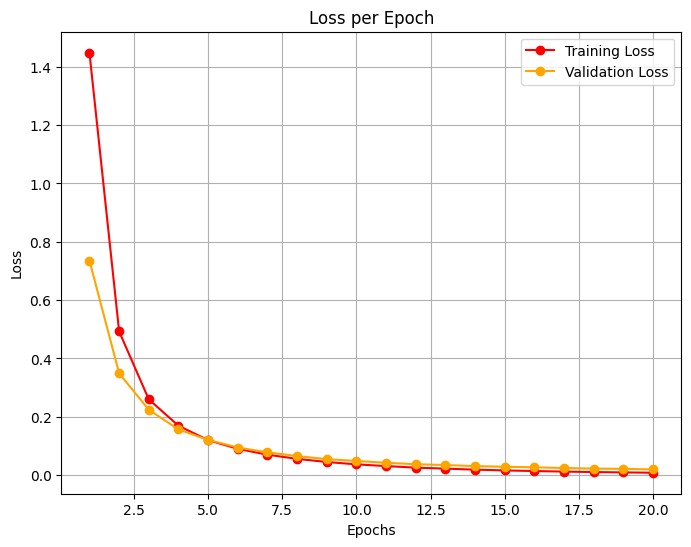

In [11]:
# Plot training and validation accuracy per epoch
def plot_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs_range, acc, label="Training Accuracy", marker="o")
    plt.plot(epochs_range, val_acc, label="Validation Accuracy", marker="o")
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot training and validation loss per epoch
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(loss) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs_range, loss, label="Training Loss", marker="o", color="red")
    plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o", color="orange")
    plt.title("Loss per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

# Call the functions
plot_accuracy(history)
plot_loss(history)


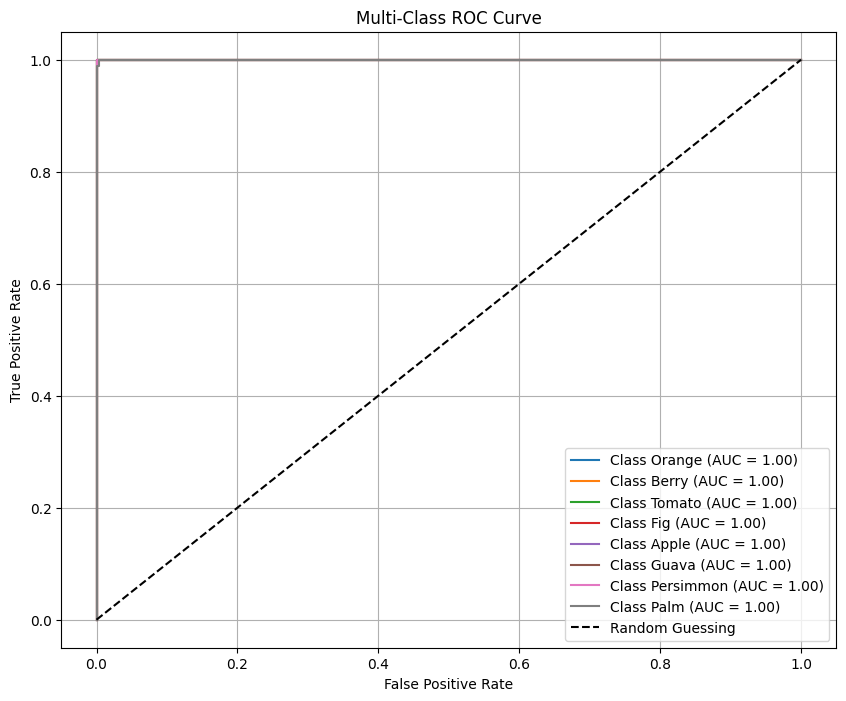

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels for multi-class ROC
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=range(len(categories)))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(categories)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(len(categories)):
    plt.plot(fpr[i], tpr[i], label=f"Class {categories[i]} (AUC = {roc_auc[i]:.2f})")

# Plot diagonal line
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")

# Graph details
plt.title("Multi-Class ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Fit the data generator on training images
datagen.fit(X_train)

# Use the generator during training
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 36s 321ms/step - accuracy: 0.9691 - loss: 0.1069 - val_accuracy: 0.9930 - val_loss: 0.0274
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 278ms/step - accuracy: 0.9808 - loss: 0.0742 - val_accuracy: 0.9944 - val_loss: 0.0222
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 276ms/step - accuracy: 0.9849 - loss: 0.0559 - val_accuracy: 0.9972 - val_loss: 0.0231
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 288ms/step - accuracy: 0.9915 - loss: 0.0560 - val_accuracy: 0.9972 - val_loss: 0.0227
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 276ms/step - accuracy: 0.9931 - loss: 0.0456 - val_accuracy: 0.9972 - val_loss: 0.0229
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 281ms/step - accuracy: 0.9881 - loss: 0.0428 - val_accuracy: 0.9958 - val_loss: 0.0224
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 284ms/step - accuracy: 0.9919 - loss: 0.0428 - val_accuracy: 0.9972 - val_loss: 0.0220
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 279ms/step - accuracy: 0.9958 - loss: 0.0342 - val_accuracy: 0.995

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,752,986 (10.50 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 330,002 (1.26 MB)

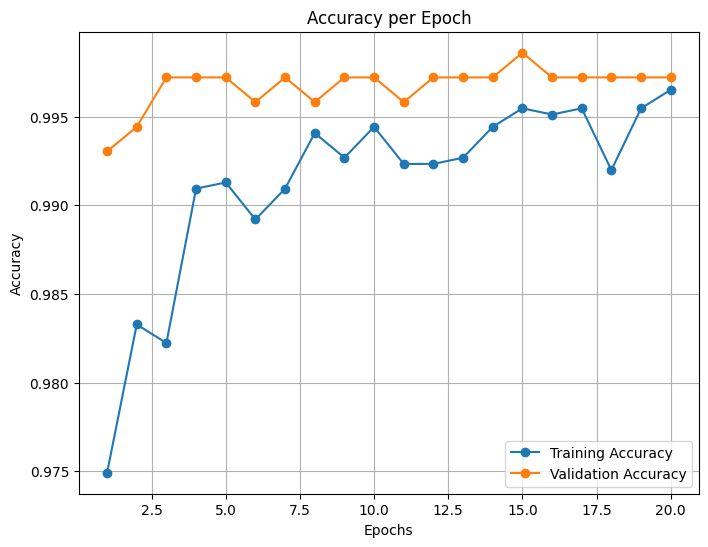

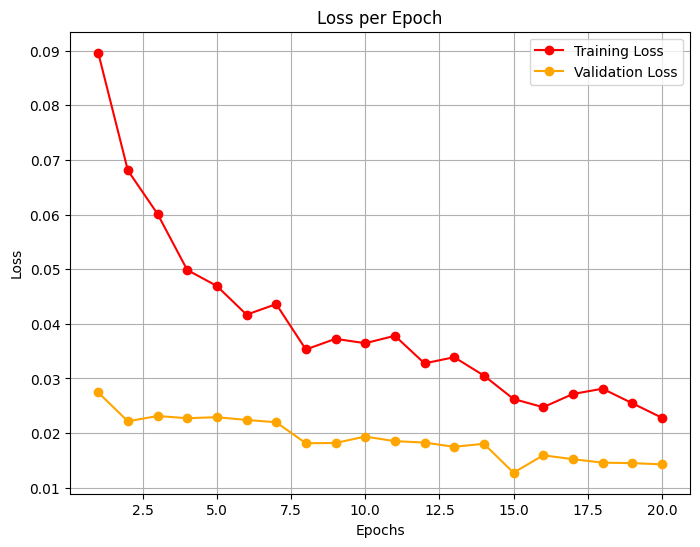

In [15]:
# Plot training and validation accuracy per epoch
def plot_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs_range, acc, label="Training Accuracy", marker="o")
    plt.plot(epochs_range, val_acc, label="Validation Accuracy", marker="o")
    plt.title("Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot training and validation loss per epoch
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(loss) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs_range, loss, label="Training Loss", marker="o", color="red")
    plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o", color="orange")
    plt.title("Loss per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

# Call the functions
plot_accuracy(history)
plot_loss(history)


In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9972 - loss: 0.0113
Test Accuracy: 1.00


In [18]:
model.save('Plantidentifier.h5')